In [2]:
# import dask.dataframe as dd
# import dask.multiprocessing
import os
path = "./data/"

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH'] 


# import xgboost as xgb


In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
plt.style.use('fivethirtyeight')

In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [4]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

In [5]:
installments_payments = pd.read_csv(path+ "installments_payments.csv")

In [6]:
application_train = pd.read_csv("./data/application_train.csv")
application_test = pd.read_csv("./data/application_test.csv")

In [7]:
missing_values_table(installments_payments)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


In [ ]:
cols = ['SK_ID_CURR']
installments_payments_PCA = pd.merge(installments_payments, application_train[cols], on='SK_ID_CURR')

In [8]:
# installments_payments
installments_payments.DAYS_ENTRY_PAYMENT[installments_payments.DAYS_ENTRY_PAYMENT.isnull()] = installments_payments.DAYS_ENTRY_PAYMENT.mean()
installments_payments.AMT_PAYMENT[installments_payments.AMT_PAYMENT.isnull()] = installments_payments.AMT_PAYMENT.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
installments_payments.isnull().any()

SK_ID_PREV                False
SK_ID_CURR                False
NUM_INSTALMENT_VERSION    False
NUM_INSTALMENT_NUMBER     False
DAYS_INSTALMENT           False
DAYS_ENTRY_PAYMENT        False
AMT_INSTALMENT            False
AMT_PAYMENT               False
dtype: bool

In [ ]:
kde_list = [ 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT']
for col in kde_list:
    kde_target(col, installments_payments_PCA)

In [ ]:
installments_payments.dtypes

In [ ]:
installments_payments.head()

In [9]:
installments_payments.NUM_INSTALMENT_VERSION = pd.Categorical(installments_payments.NUM_INSTALMENT_VERSION )

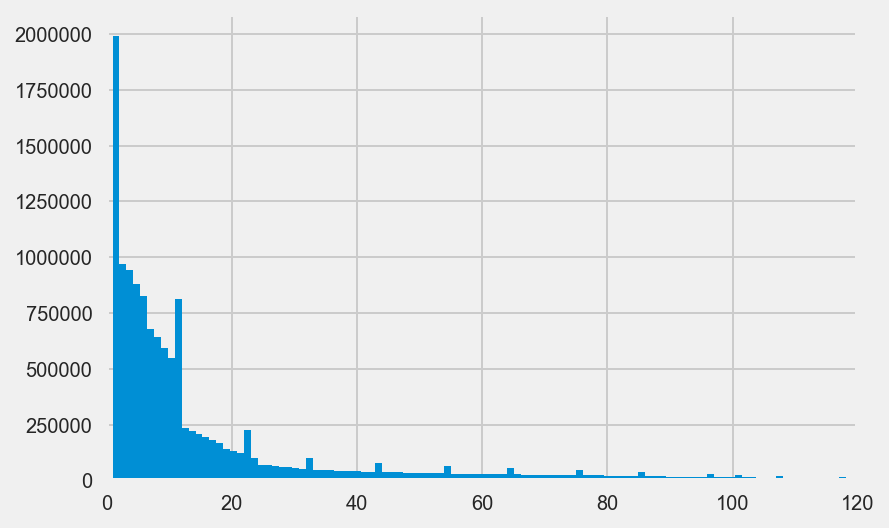

In [19]:
plt.hist(installments_payments.NUM_INSTALMENT_NUMBER, bins= 250)
plt.xlim(0,120)
plt.show()

In [10]:
installments_payments = pd.get_dummies(installments_payments)

In [13]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT', 'NUM_INSTALMENT_VERSION_0.0',
       'NUM_INSTALMENT_VERSION_1.0', 'NUM_INSTALMENT_VERSION_2.0',
       'NUM_INSTALMENT_VERSION_3.0', 'NUM_INSTALMENT_VERSION_4.0',
       'NUM_INSTALMENT_VERSION_5.0', 'NUM_INSTALMENT_VERSION_6.0',
       'NUM_INSTALMENT_VERSION_7.0', 'NUM_INSTALMENT_VERSION_8.0',
       'NUM_INSTALMENT_VERSION_9.0', 'NUM_INSTALMENT_VERSION_10.0',
       'NUM_INSTALMENT_VERSION_11.0', 'NUM_INSTALMENT_VERSION_12.0',
       'NUM_INSTALMENT_VERSION_13.0', 'NUM_INSTALMENT_VERSION_14.0',
       'NUM_INSTALMENT_VERSION_15.0', 'NUM_INSTALMENT_VERSION_16.0',
       'NUM_INSTALMENT_VERSION_17.0', 'NUM_INSTALMENT_VERSION_18.0',
       'NUM_INSTALMENT_VERSION_19.0', 'NUM_INSTALMENT_VERSION_20.0',
       'NUM_INSTALMENT_VERSION_21.0', 'NUM_INSTALMENT_VERSION_22.0',
       'NUM_INSTALMENT_VERSION_23.0', 'NUM_INSTALMENT_VERSION_24.0',
   

In [11]:
cols_to_means = ['SK_ID_CURR', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT', 'NUM_INSTALMENT_NUMBER']
cols_to_sums = ['SK_ID_CURR', 'NUM_INSTALMENT_VERSION_0.0', 'NUM_INSTALMENT_VERSION_1.0',
       'NUM_INSTALMENT_VERSION_2.0', 'NUM_INSTALMENT_VERSION_3.0',
       'NUM_INSTALMENT_VERSION_4.0', 'NUM_INSTALMENT_VERSION_5.0',
       'NUM_INSTALMENT_VERSION_6.0', 'NUM_INSTALMENT_VERSION_7.0',
       'NUM_INSTALMENT_VERSION_8.0', 'NUM_INSTALMENT_VERSION_9.0',
       'NUM_INSTALMENT_VERSION_10.0', 'NUM_INSTALMENT_VERSION_11.0',
       'NUM_INSTALMENT_VERSION_12.0', 'NUM_INSTALMENT_VERSION_13.0',
       'NUM_INSTALMENT_VERSION_14.0', 'NUM_INSTALMENT_VERSION_15.0',
       'NUM_INSTALMENT_VERSION_16.0', 'NUM_INSTALMENT_VERSION_17.0',
       'NUM_INSTALMENT_VERSION_18.0', 'NUM_INSTALMENT_VERSION_19.0',
       'NUM_INSTALMENT_VERSION_20.0', 'NUM_INSTALMENT_VERSION_21.0',
       'NUM_INSTALMENT_VERSION_22.0', 'NUM_INSTALMENT_VERSION_23.0',
       'NUM_INSTALMENT_VERSION_24.0', 'NUM_INSTALMENT_VERSION_25.0',
       'NUM_INSTALMENT_VERSION_26.0', 'NUM_INSTALMENT_VERSION_27.0',
       'NUM_INSTALMENT_VERSION_28.0', 'NUM_INSTALMENT_VERSION_29.0',
       'NUM_INSTALMENT_VERSION_30.0', 'NUM_INSTALMENT_VERSION_31.0',
       'NUM_INSTALMENT_VERSION_32.0', 'NUM_INSTALMENT_VERSION_33.0',
       'NUM_INSTALMENT_VERSION_34.0', 'NUM_INSTALMENT_VERSION_35.0',
       'NUM_INSTALMENT_VERSION_36.0', 'NUM_INSTALMENT_VERSION_37.0',
       'NUM_INSTALMENT_VERSION_38.0', 'NUM_INSTALMENT_VERSION_39.0',
       'NUM_INSTALMENT_VERSION_40.0', 'NUM_INSTALMENT_VERSION_41.0',
       'NUM_INSTALMENT_VERSION_42.0', 'NUM_INSTALMENT_VERSION_43.0',
       'NUM_INSTALMENT_VERSION_44.0', 'NUM_INSTALMENT_VERSION_45.0',
       'NUM_INSTALMENT_VERSION_46.0', 'NUM_INSTALMENT_VERSION_47.0',
       'NUM_INSTALMENT_VERSION_48.0', 'NUM_INSTALMENT_VERSION_49.0',
       'NUM_INSTALMENT_VERSION_50.0', 'NUM_INSTALMENT_VERSION_51.0',
       'NUM_INSTALMENT_VERSION_52.0', 'NUM_INSTALMENT_VERSION_53.0',
       'NUM_INSTALMENT_VERSION_54.0', 'NUM_INSTALMENT_VERSION_55.0',
       'NUM_INSTALMENT_VERSION_56.0', 'NUM_INSTALMENT_VERSION_57.0',
       'NUM_INSTALMENT_VERSION_58.0', 'NUM_INSTALMENT_VERSION_59.0',
       'NUM_INSTALMENT_VERSION_61.0', 'NUM_INSTALMENT_VERSION_68.0',
       'NUM_INSTALMENT_VERSION_72.0', 'NUM_INSTALMENT_VERSION_73.0',
       'NUM_INSTALMENT_VERSION_178.0'
     ]


In [ ]:
installments_payments.columns.values

In [ ]:

instal1 = installments_payments[cols_to_means].groupby('SK_ID_CURR').mean()

# df2.data1.groupby(df2.key1).sum()
instal2 = installments_payments[cols_to_sums].groupby('SK_ID_CURR').sum()



In [ ]:
installments_payments_df = pd.concat( [instal1, instal2] , axis = 1)
installments_payments_df.reset_index(inplace = True)

In [ ]:
cols = ['SK_ID_CURR']
installments_payments_train = pd.merge(installments_payments_df, application_train[cols], on='SK_ID_CURR', how='inner')
installments_payments_test = pd.merge(installments_payments_df, application_test[cols], on='SK_ID_CURR', how='inner')

In [18]:
installments_payments_train.isnull().any().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [ ]:
installments_payments_train[installments_payments_train.SK_ID_CURR == 151950]

In [19]:
installments_payments_test.isnull().any().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [13]:
installments_payments_train.to_csv('installments_payments_train.csv')
installments_payments_test.to_csv('installments_payments_test.csv')

In [12]:
len(installments_payments_train), len(installments_payments_test), len(installments_payments_df)

(291643, 47944, 339587)

In [32]:
291643 + 47944

339587